In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Code zum Auslesen

```py
import redlab as rl
import math
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

# rl.cbVIn(0,0,1)

# print("Voltage Value: " + str(rl.cbVOut(0,0,101,3)))

# sin_wave = 2.5 + np.sin(np.array(np.arange(0, 10000, 0.2)))

# for i in range(0, sin_wave.size):
#     sleep(1/100)
#     #print(sin_wave[i])
#     #print(math.sin(i))
#     rl.cbVOut(0,0,101,sin_wave[i])

# print("Voltage Value: " + str(rl.cbVOut(0,0,101,3)))

space = np.array(np.floor(np.linspace(1500, 6000, num=7)), dtype=int)


redm = []

for s in space:
    print("measuring", s)
    input("warten")
    redm.append(rl.cbVInScan(0,0,0,1000,6000,1))
    
redm = np.array(redm)
print(redm.shape)
print("Messreihe: " + str(redm))


fig, ax = plt.subplots(7, figsize=(10, 30))

for i in range(0,7):
    ax[i].set_title("rate: " + str(space[i]))
    ax[i].plot(redm[i])

np.save("./redm_data", redm)
```

# 5. Abtasttheorem

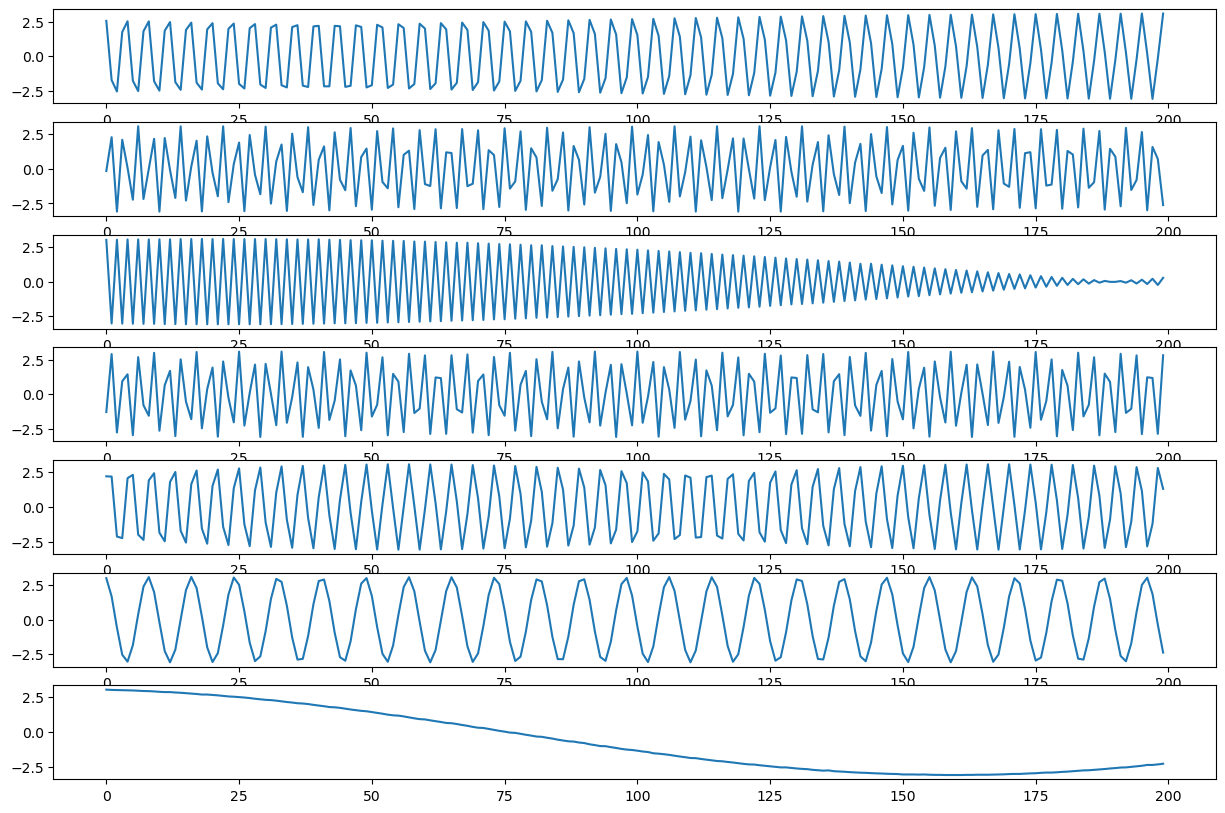

In [9]:
data = np.load("redm_data.npy")
data[2,:] = np.load("3000_redm.npy") # bessere einlesung von der 3. messung

fig, ax = plt.subplots(data.shape[0], figsize=(15, 10))
for i in range(0, data.shape[0]):
    ax[i].plot(data[i, 400:600])